In [3]:
!git clone https://github.com/john-science/mazelib.git tempmaze

Cloning into 'tempmaze'...


In [ ]:
# !mv tempmaze/mazelib mazelib
!rm -rf tempmaze

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from  mazelib.mazelib import Maze
from  mazelib.generate.BacktrackingGenerator import BacktrackingGenerator
from  mazelib.generate.BinaryTree import BinaryTree
from typing import Callable



In [462]:
MAZE_DIMENSION = 5



def gen_binary_tree_mazelib_maze(dimensions: tuple) -> np.ndarray:
    m = Maze()
    m.generator = BinaryTree(dimensions[0],dimensions[1])
    m.generate()
    m.generate_entrances()
    m_start = m.start
    m_end = m.end
    m.grid[m_start[0], m_start[1]] = 2
    m.grid[m_end[0], m_end[1]] = 3
    return m.grid
    
def gen_backtracking_mazelib_maze(dimensions: tuple) -> np.ndarray:
    m = Maze()
    m.generator = BacktrackingGenerator(dimensions[0],dimensions[1])
    m.generate()
    m.generate_entrances()
    m_start = m.start
    m_end = m.end
    m.grid[m_start[0], m_start[1]] = 2
    m.grid[m_end[0], m_end[1]] = 3
    return m.grid, np.array(m_start), np.array(m_end)

def build_make_maze_reward(gen_maze: Callable[[tuple], np.ndarray]):
    # TODO cambiar por algo que sea mas facil de leer
    # 0 vacio
    # 1 pared
    # 2 start
    # 3 end
    reward_list = np.array([-100,-1000,-10,100000])

    def reward_mapper(maze : np.ndarray, start_position):
        no_round_walls_reward_mapper = lambda x : reward_list[x]

        reward = np.zeros(maze.shape, dtype=np.int64)
        # reward = np.copy(maze)
        factor = 2

        for i in range(maze.shape[0]):
            for j in range(maze.shape[1]):

                if ( maze[i,j] == 3 ):
                    reward[i,j] = no_round_walls_reward_mapper(maze[i,j])
                    continue
                if ( maze[i,j] == 1 ):
                    reward[i,j] = no_round_walls_reward_mapper(maze[i,j])
                    continue
                if ( maze[i,j] == 2 ):
                    reward[i,j] = no_round_walls_reward_mapper(maze[i,j])
                    continue

                cof =  no_round_walls_reward_mapper(maze[i,j])  / ( (1 / 20) * np.linalg.norm(np.array([i,j]) - start_position) + 0.1) 

                coun_neighbors = 0
                if (maze[i - 1, j] == 1):
                    coun_neighbors +=1
                if (maze[i, j + 1] == 1):
                    coun_neighbors +=1
                if (maze[i + 1, j] == 1):
                    coun_neighbors +=1
                if (maze[i, j -1] == 1):
                    coun_neighbors +=1
                # Evaluamos si es una callejon sin salida
                if (coun_neighbors >= 3):
                    reward[i,j] = no_round_walls_reward_mapper(1) 
                    continue
                
                reward[i,j] = cof
        return reward


    def make_maze_reward(dimensions = (5,5)):
        m, m_start, m_end = gen_maze((dimensions[0], dimensions[1]))
        reward = reward_mapper(m.copy(), m_start)
        return (m, m_start, m_end, reward)
    return make_maze_reward

builder = build_make_maze_reward(gen_backtracking_mazelib_maze)
maze, start_position, end_position, reward = builder((MAZE_DIMENSION,MAZE_DIMENSION))

print('Maze')
print(maze)
print('Reward')
print(reward)
print('start_position')
print(start_position)
print('end_position')
print(end_position)



Maze
[[1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 2]
 [1 0 1 1 1 0 1 0 1 1 1]
 [1 0 0 0 1 0 1 0 0 0 1]
 [1 1 1 1 1 0 1 1 1 0 1]
 [3 0 0 0 1 0 0 0 0 0 1]
 [1 0 1 1 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 0 0 1]
 [1 0 1 1 1 0 1 0 1 1 1]
 [1 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1]]
Reward
[[ -1000  -1000  -1000  -1000  -1000  -1000  -1000  -1000  -1000  -1000
   -1000]
 [ -1000   -181   -200   -222   -250   -285  -1000   -400   -500   -666
     -10]
 [ -1000   -180  -1000  -1000  -1000   -281  -1000   -387  -1000  -1000
   -1000]
 [ -1000   -178   -195  -1000  -1000   -270  -1000   -356   -414   -472
   -1000]
 [ -1000  -1000  -1000  -1000  -1000   -255  -1000  -1000  -1000   -387
   -1000]
 [100000   -168   -182  -1000  -1000   -238   -261   -285   -309   -326
   -1000]
 [ -1000   -162  -1000  -1000  -1000  -1000  -1000  -1000  -1000   -281
   -1000]
 [ -1000   -156   -166   -178   -190   -203  -1000   -229   -240   -247
   -1000]
 [ -1000   -149  -1000  -1000  -1000   -188  -1000   -20

In [463]:
def plot_mazes(mazes : np.ndarray, plot_shape = 7):
    n_subplots = mazes.shape[0]
    
    plt.figure(figsize=(plot_shape,plot_shape)) # La imagen del conjunto de ropas se hace mas grande

    for i, maze in enumerate(mazes):
        # image = image.numpy().reshape((28,28))
        # se dibuja la primera figura
        plt.subplot(5,5,i+1) # creamos subplots para cada ropa
        plt.xticks([]) # Esto hace que quite los valores de los ejes, mas limpio
        plt.yticks([])
        plt.grid(False)
        # TODO Mostrar inicio y fin con otros colores
        plt.imshow(maze, cmap=plt.cm.binary)
        
    plt.show() # no es necesaria
    
def plot_maze(maze : np.ndarray):
    
    plt.figure()
    plt.imshow(maze, cmap=plt.cm.gist_gray)
    plt.colorbar()
    plt.grid(False)
    plt.xticks(range(maze.shape[1]))
    plt.yticks(range(maze.shape[0]))
    plt.show()


def plot_reward(reward : np.ndarray):
    start = np.unravel_index(np.argmax(reward), shape=reward.shape)
    end = np.unravel_index(np.argmin(reward), shape=reward.shape)
    reward_to_plot = reward.copy()
    reward_to_plot[start] = -5
    reward_to_plot[end] = -100
    plt.figure()
    plt.imshow(reward_to_plot, cmap=plt.cm.Reds)
    plt.colorbar()
    plt.grid(False)
    plt.xticks(range(reward_to_plot.shape[1]))
    plt.yticks(range(reward_to_plot.shape[0]))
    plt.show()


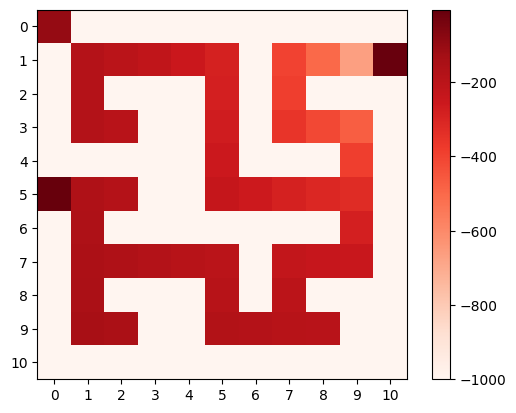

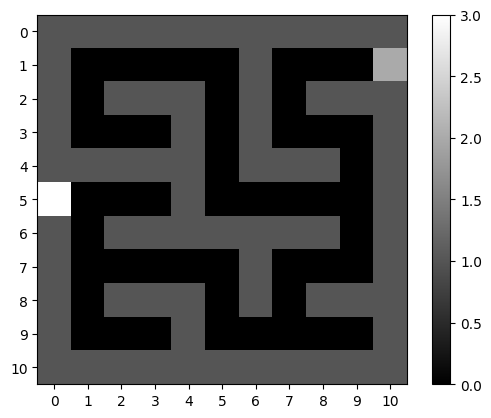

In [464]:
plot_reward(reward)

plot_maze(maze)

In [ ]:
from enum import IntEnum

# class syntax
class MazeActions(IntEnum):
    UP = 0
    RIGHT = 1
    DOWN = 2
    LEFT = 3

# TODO estafoso
MAZE_ACTIONS_MAPPER = np.array([[-1,0],[0,1],[1,0],[0,-1]])

class MazeEnv:

    agent_position :np.ndarray = None
    start_position = None
    end_position = None
    maze = None
    path = None
    reward_matrix = None    
    reward = 0
    out_of_bounds_reward = -1000
    actions = np.array([
        MazeActions.UP,
        MazeActions.RIGHT,
        MazeActions.DOWN,
        MazeActions.LEFT
    ])

    def __init__(self, maze : np.ndarray, reward_matrix : np.ndarray, start_position : np.ndarray, end_position : np.ndarray):
        self.maze = maze.copy()
        self.reward_matrix = reward_matrix.copy()
        self.start_position = start_position.copy()
        self.end_position = end_position.copy()
        self.agent_position = start_position.copy()
        self.path = [self.start_position.copy()]

    def get_dimensions(self):
        return maze.shape

    def isDone(self):
        return (np.array_equal(self.end_position, self.agent_position))
    
    def __is_visited(self, position):
        for step in self.path:
            if (np.array_equal(step, position)):
                # print(True)
                return True
        return False
    
    def __is_out_of_bounds(self, position):
        return not ((-1 < position[0] <  maze.shape[0]) and (-1 < position[1] <  maze.shape[1]))

    def __is_a_wall(self,position):
        # TODO : cambiar por una tupla
        return (self.maze[position[0],position[1]] == 1)

    def get_valid_actions(self, position):
        valid_actions = []
        for act in self.actions:
            new_position = position + MAZE_ACTIONS_MAPPER[act]
            if not (self.__is_visited(new_position) or self.__is_out_of_bounds(new_position) or self.__is_a_wall(new_position)):
                valid_actions.append(act)
        return np.array(valid_actions)
    
    def show_env_state(self):
        print(f"agent_position {self.agent_position}")
        print(f"start_position {self.start_position}")
        print(f"end_position {self.end_position}")
        print(f"path {self.path}")

    def step(self, action : MazeActions):
        
        self.agent_position += MAZE_ACTIONS_MAPPER[action]

        if self.__is_visited(self.agent_position):
            self.show_env_state()
            raise Exception(f'step to {self.agent_position} not valid, path {self.path}')
        
        if self.__is_out_of_bounds(self.agent_position):
            self.show_env_state()
            raise Exception(f'step to {self.agent_position} out of bounds, action {action} prev position {self.agent_position - MAZE_ACTIONS_MAPPER[action]} valid_actions {self.get_valid_actions(self.agent_position - MAZE_ACTIONS_MAPPER[action])}')

        if self.__is_a_wall(self.agent_position):
            self.show_env_state()
            raise Exception(f'step to {self.agent_position} not valid, that position is a wall {self.maze[self.agent_position[0], self.agent_position[1]]}')


        self.reward += self.reward_matrix[self.agent_position[0], self.agent_position[1]]
        self.path.append(self.agent_position.copy())
        return self.agent_position, self.reward, self.isDone()
    
    def reset(self):
        self.agent_position = self.start_position.copy()
        self.reward = 0
        self.path = [self.start_position.copy()]
        return self.agent_position.copy()

In [ ]:
def choose_action(q_table, state, actions, must_be_random_action=False) -> MazeActions: 
    if ( must_be_random_action ):
        return np.random.choice(actions,1)[0]
    choice = actions[0]
    # TODO Se puede hacer mejorar con numpy?
    for act in actions[1:]:
        if (q_table[state,choice] < q_table[state,act]):
            choice = act
    return choice

def build_initial_q_table(n_states ,n_actions, is_empty=False):
    if (is_empty):
        return np.zeros((n_states, n_actions))
    return np.random.random(size=(n_states, n_actions))

# TODO Use Ravel_index from numpy
def calculate_position_to_state(n_cols,  position : np.ndarray): 
    return (position[0]) * (n_cols)  + position[1]

def generate_q_table(
        mazeEnv : MazeEnv,
        episodes = 10000, 
        alpha = 0.9, gamma = 0.95,
        epsilon = 1.0, epsilon_decay = 0.999995, min_epsilon = 0.01,
        max_steps = 100,
        verbose = True
    ):

    cols = mazeEnv.get_dimensions()[1]

    q_table = build_initial_q_table(maze.shape[0] * maze.shape[1], mazeEnv.actions.shape[0], True)
    best_reward = {
        'path' : [],
        'reward' : -10000
    }    
    count_is_done = 0
    for episode in range(episodes):
        actual_position = mazeEnv.reset()
        isDone = False
        # print(f"In Episode {episode}")
        for step in range(max_steps):
            state = calculate_position_to_state(cols, mazeEnv.agent_position)
        
            valid_actions = mazeEnv.get_valid_actions(mazeEnv.agent_position)

            if (valid_actions.shape[0] == 0):
                break;
            
            action = choose_action(
                q_table, 
                state,
                valid_actions,
                (random.uniform(0,1) < epsilon)
            )

            next_position, reward, isDone = mazeEnv.step(action)

            next_state = calculate_position_to_state(cols, next_position)

            old_q_value = q_table[state,action]
            next_max_q_value = np.max(q_table[next_state, :])
            q_table[state,action] = (1 - alpha) * old_q_value + alpha + (reward + gamma * next_max_q_value)
            if ( isDone ):
                count_is_done += 1
                break
        if ( verbose ):
            print()
            print(f"Episode {episode} finisehd with {reward}, isDone {isDone}, epsilon {epsilon}")
        if (best_reward['reward'] < reward ) and (verbose):
            print(f"New Best Reward {reward}")
            best_reward['path'] = mazeEnv.path.copy()
            best_reward['reward'] = reward
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
    if ( verbose ):
        print(f"Qtable generated! number of episodes with maze solved {count_is_done}")
    return (q_table, count_is_done)


In [ ]:


def solve_maze_from_q_table(mazeEnv : MazeEnv, q_table : np.ndarray, episodes = 1, max_steps = 100):
    cols = mazeEnv.get_dimensions()[1]
    actions = np.array([
        MazeActions.UP,
        MazeActions.RIGHT,
        MazeActions.DOWN,
        MazeActions.LEFT
    ])
    
    for episode in range(episodes):
        mazeEnv.reset()
        isDone = False
        print(f"In Episode {episode}")
        for step in range(max_steps):
            
            state = calculate_position_to_state(cols, mazeEnv.agent_position)
            valid_actions = mazeEnv.get_valid_actions(mazeEnv.agent_position)

            if (valid_actions.shape[0] == 0):
                break;
            
            action = choose_action(
                q_table, 
                state,
                valid_actions,
                False
            )
            next_state,  reward, isDone = mazeEnv.step(action)
            if (isDone):
                print("Finished!")
                break

        print(f"Episode {episode} finisehd with {reward} and isDone {isDone}")
        
        
    return mazeEnv.path.copy()

In [468]:
def plot_maze_with_path(maze : np.ndarray, path : np.ndarray):

    def make_maze_with_path(intensity = 5):
        path_with_maze = np.copy(maze)
        
        for i, position in enumerate(path):
            path_with_maze[position[0],position[1]] = intensity
        return path_with_maze

    _,ax = plt.subplots()
    pa = ax.imshow(make_maze_with_path(),interpolation='nearest')
    plt.colorbar(pa,shrink=0.25)
    plt.xticks(range(maze.shape[1]))
    plt.yticks(range(maze.shape[0]))
    plt.show()


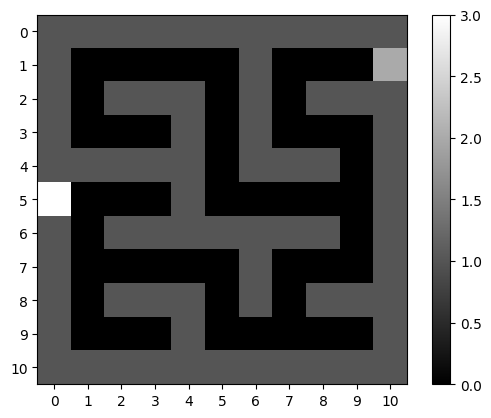


Episode 0 finisehd with -8498, isDone False, epsilon 1
New Best Reward -8498

Episode 1 finisehd with -8498, isDone False, epsilon 0.9995

Episode 2 finisehd with -8250, isDone False, epsilon 0.9990002500000001
New Best Reward -8250

Episode 3 finisehd with -8498, isDone False, epsilon 0.9985007498750001

Episode 4 finisehd with -8179, isDone False, epsilon 0.9980014995000627
New Best Reward -8179

Episode 5 finisehd with -8498, isDone False, epsilon 0.9975024987503127

Episode 6 finisehd with -8498, isDone False, epsilon 0.9970037475009376

Episode 7 finisehd with -8250, isDone False, epsilon 0.9965052456271871

Episode 8 finisehd with -6496, isDone False, epsilon 0.9960069930043736
New Best Reward -6496

Episode 9 finisehd with -8179, isDone False, epsilon 0.9955089895078715

Episode 10 finisehd with -8250, isDone False, epsilon 0.9950112350131176

Episode 11 finisehd with -6496, isDone False, epsilon 0.9945137293956111

Episode 12 finisehd with -8498, isDone False, epsilon 0.994016

In [469]:

plot_maze(maze)
env = MazeEnv(maze, reward, start_position, end_position)
#   70%  para 5x5 (matrices 10x10)
    # env,
    # episodes=10000,
    # epsilon=1,
    # epsilon_decay=0.99995,
    # min_epsilon=0.01,
    # alpha= 0.9,
    # gamma= 1.8
# )
# regular para 14x14 
    # env,
    # episodes=10000,
    # epsilon=1,
    # epsilon_decay=0.99995,
    # min_epsilon=0.01,
    # alpha= 0.9,
    # gamma= 1.8

q_table, _ = generate_q_table(
    env,
    episodes=6000,
    epsilon=1,
    epsilon_decay=0.9995,
    min_epsilon=0.01,
    alpha= 0.9,
    gamma= 1.8
)

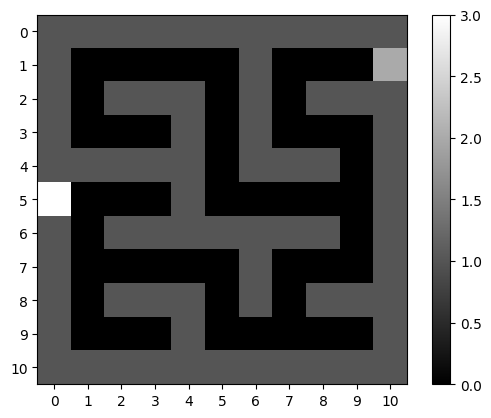

In Episode 0
Finished!
Episode 0 finisehd with 92932 and isDone True


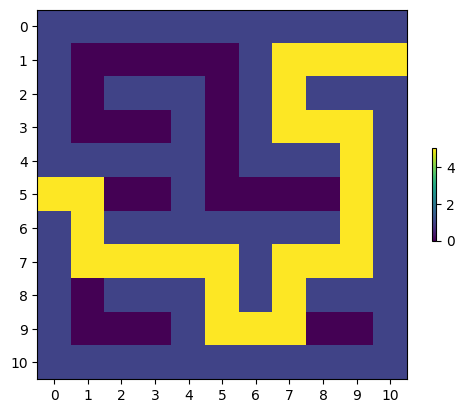

In [470]:
#
plot_maze(maze)

path = solve_maze_from_q_table(env,q_table)
plot_maze_with_path(env.maze, env.path)


In [471]:
import pathlib 
import csv

path = './dataset/maze5x5_qtable_data.csv'

def save_in_mazes_qtables_csv(mazes, q_tables, csv_path = 'maze_qtable_data.csv'):
    path = pathlib.Path(csv_path)
    dictionary = {'mazes': mazes, 'q_tables': q_tables}
    df = pd.DataFrame(dictionary)
    df.to_csv(csv_path, header=True, index=True)
    return df
# Obviamente esta funcion no debe ser asi
def read_mazes_qtables_csv(csv_path):
    path = pathlib.Path(csv_path)
    if (path.exists()):
        df = pd.read_csv(csv_path)
        return (df['mazes'], df['q_tables'])

In [472]:
def generate_dataset(n_samples = 10, dimensions = (5,5), verbose = True):
    envs = []
    q_tables = []
    while(n_samples > 0):
        
        make_maze_reward = build_make_maze_reward(gen_backtracking_mazelib_maze)
        
        maze, start_position, end_position, reward = make_maze_reward(dimensions)
        env = MazeEnv(maze, reward, start_position, end_position)
        
        if ( verbose ):
            print(f"{n_samples} samples remain")
            print(f"generating q_table...")

        q_table, count_is_done = generate_q_table(
            env,
            episodes=6000,
            epsilon=1,
            epsilon_decay=0.9995,
            min_epsilon=0.01,
            alpha= 0.9,
            gamma= 1.8,
            verbose=False
        )
        q_tables.append(q_table.copy())
        envs.append(env)

        if ( verbose ):
            print(f"Sample generated with {count_is_done} dones!")
        n_samples -= 1
        
    return envs, q_tables 

In [473]:
envs, q_tables = generate_dataset(5,(5,5), verbose=True)

5 samples remain
generating q_table...
Sample generated with 3387 dones!
4 samples remain
generating q_table...
Sample generated with 3855 dones!
3 samples remain
generating q_table...
Sample generated with 3807 dones!
2 samples remain
generating q_table...
Sample generated with 3461 dones!
1 samples remain
generating q_table...
Sample generated with 4340 dones!


In Episode 0
Finished!
Episode 0 finisehd with 93542 and isDone True


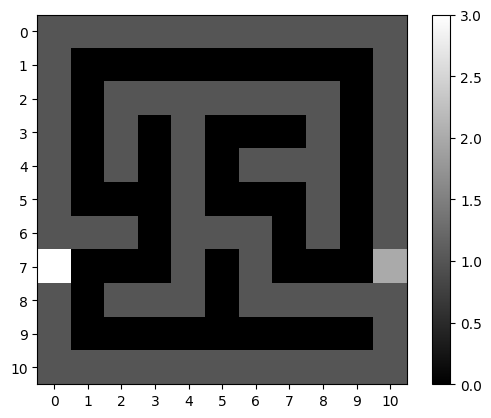

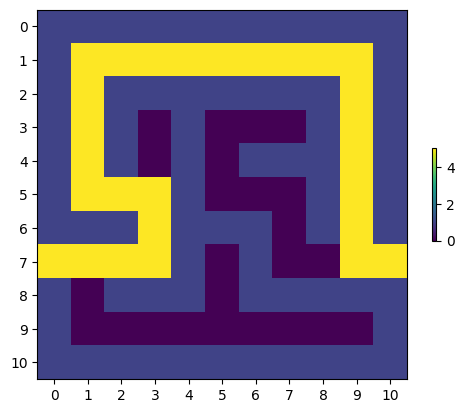

In [ ]:
path=solve_maze_from_q_table(q_table=q_tables[1], mazeEnv=envs[1])
plot_maze(maze=envs[1].maze)
plot_maze_with_path( maze=envs[1].maze, path=path)
